<a href="https://colab.research.google.com/github/meriemdouider1/tp-deep-learning/blob/main/TP_1_ANN_Q5_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TP1 : ANN (Q5) **

# **Setup**

In [ ]:
# Common imports
import numpy as np
import os

In [ ]:
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [ ]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.3.0'

Let's start by loading the MNIST digits dataset. Keras has a number of functions to load popular datasets in keras.datasets. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

https://keras.io/api/datasets/mnist/

In [ ]:
data = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = data.load_data()

In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
y_train_full

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
X_valid, X_train = X_train_full[:7000] / 255., X_train_full[7000:] / 255.
y_valid, y_train = y_train_full[:7000], y_train_full[7000:]
X_test = X_test / 255.

In [ ]:
X_valid.shape

(7000, 28, 28)

In [ ]:
X_train.shape

(53000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

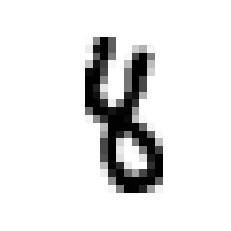

In [ ]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

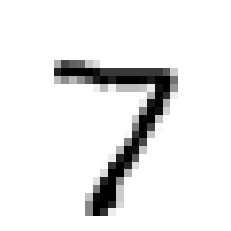

In [ ]:
plt.imshow(X_test[0], cmap="binary")
plt.axis('off')
plt.show()

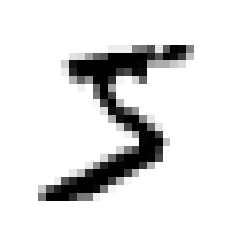

In [ ]:
plt.imshow(X_valid[0], cmap="binary")
plt.axis('off')
plt.show()

In [ ]:
class_names = ["0", "1", "2", "3", "4","5", "6", "7", "8", "9"]

In [ ]:
class_names[y_train[0]]

'8'

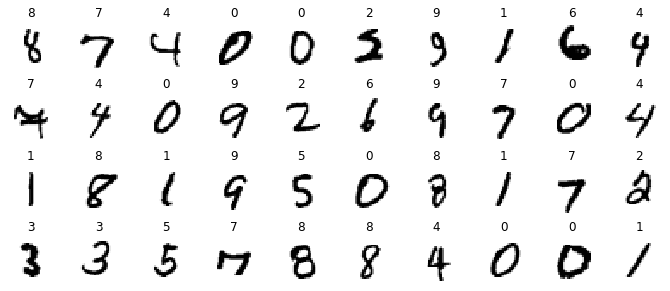

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.show()


# **Construct a Model**


In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
keras.backend.clear_session()
np.random.seed(42)

In [ ]:
model.layers

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [ ]:
model.get_layer(hidden1.name) is hidden1

True

In [ ]:
weights, biases = hidden1.get_weights()

In [ ]:
weights

array([[ 0.01617655,  0.0674751 ,  0.02052123, ...,  0.02189709,
        -0.04827797, -0.05684905],
       [ 0.06866451, -0.05491756, -0.07640453, ..., -0.04884448,
        -0.05103448,  0.05897571],
       [-0.07126424, -0.01215146, -0.01059245, ..., -0.03099586,
         0.00530362, -0.02873022],
       ...,
       [-0.06098728, -0.06308863, -0.05908671, ..., -0.02309285,
        -0.02039566,  0.01866676],
       [-0.07290688, -0.02272022,  0.01936599, ..., -0.06894633,
        -0.06021176,  0.0253728 ],
       [-0.04675382, -0.03229852,  0.06977442, ..., -0.05044138,
         0.06153715, -0.00549798]], dtype=float32)

In [ ]:
weights.shape

(784, 200)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
biases.shape

(200,)

# **Plot learning Curves**

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1657/1657 [==============================] - 4s 2ms/step - loss: 0.6643 - accuracy: 0.8297 - val_loss: 0.3152 - val_accuracy: 0.9150
Epoch 2/30
1657/1657 [==============================] - 4s 2ms/step - loss: 0.2960 - accuracy: 0.9153 - val_loss: 0.2435 - val_accuracy: 0.9313
Epoch 3/30
1657/1657 [==============================] - 4s 2ms/step - loss: 0.2431 - accuracy: 0.9311 - val_loss: 0.2112 - val_accuracy: 0.9409
Epoch 4/30
1657/1657 [==============================] - 4s 2ms/step - loss: 0.2084 - accuracy: 0.9411 - val_loss: 0.1851 - val_accuracy: 0.9479
Epoch 5/30
1657/1657 [==============================] - 4s 2ms/step - loss: 0.1825 - accuracy: 0.9480 - val_loss: 0.1695 - val_accuracy: 0.9503
Epoch 6/30
1657/1657 [==============================] - 4s 2ms/step - loss: 0.1630 - accuracy: 0.9528 - val_loss: 0.1542 - val_accuracy: 0.9560
Epoch 7/30
1657/1657 [==============================] - 4s 2ms/step - loss: 0.1471 - accuracy: 0.9576 - val_loss: 0.1438 - val_accuracy:

In [ ]:
history.params

{'epochs': 30, 'steps': 1657, 'verbose': 1}

In [ ]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

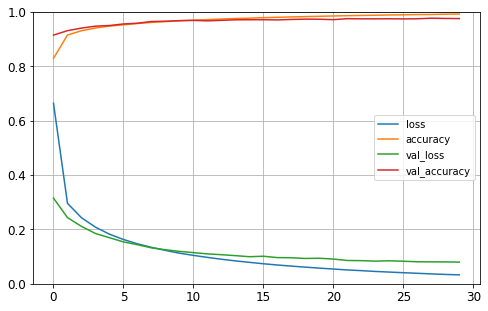

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0761 - accuracy: 0.9772


[0.07605134695768356, 0.9771999716758728]

# **Plot Learning curves when using different optimizers**


*optimizer="RMSprop"*



In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="RMSprop",
              metrics=["accuracy"])

In [ ]:
history1 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1657/1657 [==============================] - 6s 3ms/step - loss: 0.1051 - accuracy: 0.9677 - val_loss: 0.1072 - val_accuracy: 0.9693
Epoch 2/30
1657/1657 [==============================] - 6s 3ms/step - loss: 0.0790 - accuracy: 0.9772 - val_loss: 0.1097 - val_accuracy: 0.9710
Epoch 3/30
1657/1657 [==============================] - 6s 3ms/step - loss: 0.0623 - accuracy: 0.9826 - val_loss: 0.1190 - val_accuracy: 0.9709
Epoch 4/30
1657/1657 [==============================] - 6s 4ms/step - loss: 0.0516 - accuracy: 0.9852 - val_loss: 0.1019 - val_accuracy: 0.9753
Epoch 5/30
1657/1657 [==============================] - 6s 4ms/step - loss: 0.0434 - accuracy: 0.9874 - val_loss: 0.1016 - val_accuracy: 0.9756
Epoch 6/30
1657/1657 [==============================] - 6s 3ms/step - loss: 0.0368 - accuracy: 0.9903 - val_loss: 0.1126 - val_accuracy: 0.9753
Epoch 7/30
1657/1657 [==============================] - 5s 3ms/step - loss: 0.0318 - accuracy: 0.9910 - val_loss: 0.1133 - val_accuracy:

In [ ]:
history1.params

{'epochs': 30, 'steps': 1657, 'verbose': 1}

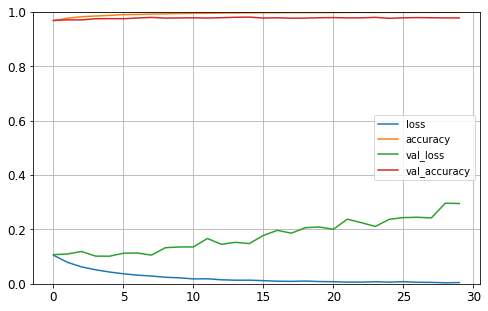

In [ ]:
import pandas as pd

pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2699 - accuracy: 0.9795


[0.26992589235305786, 0.9794999957084656]

*optimizer:Nadam*

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Nadam",
              metrics=["accuracy"])

In [ ]:
history2 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1657/1657 [==============================] - 7s 4ms/step - loss: 0.0430 - accuracy: 0.9925 - val_loss: 0.2331 - val_accuracy: 0.9753
Epoch 2/30
1657/1657 [==============================] - 7s 4ms/step - loss: 0.0383 - accuracy: 0.9929 - val_loss: 0.1981 - val_accuracy: 0.9757
Epoch 3/30
1657/1657 [==============================] - 7s 4ms/step - loss: 0.0414 - accuracy: 0.9921 - val_loss: 0.2011 - val_accuracy: 0.9759
Epoch 4/30
1657/1657 [==============================] - 7s 4ms/step - loss: 0.0265 - accuracy: 0.9942 - val_loss: 0.2257 - val_accuracy: 0.9749
Epoch 5/30
1657/1657 [==============================] - 7s 4ms/step - loss: 0.0294 - accuracy: 0.9938 - val_loss: 0.1831 - val_accuracy: 0.9747
Epoch 6/30
1657/1657 [==============================] - 7s 4ms/step - loss: 0.0223 - accuracy: 0.9949 - val_loss: 0.1810 - val_accuracy: 0.9761
Epoch 7/30
1657/1657 [==============================] - 7s 5ms/step - loss: 0.0310 - accuracy: 0.9936 - val_loss: 0.2229 - val_accuracy:

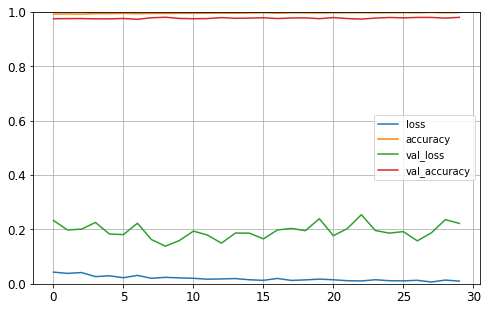

In [ ]:
import pandas as pd

pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2655 - accuracy: 0.9759


[0.2655292749404907, 0.9758999943733215]

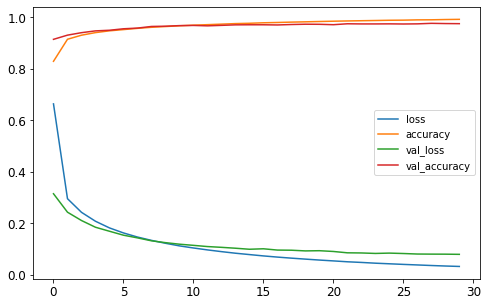

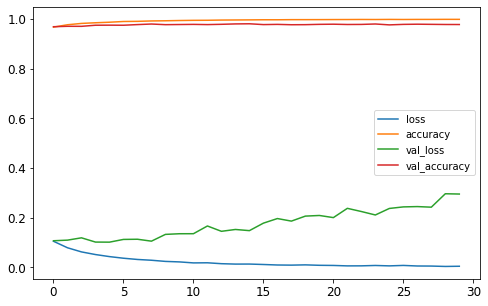

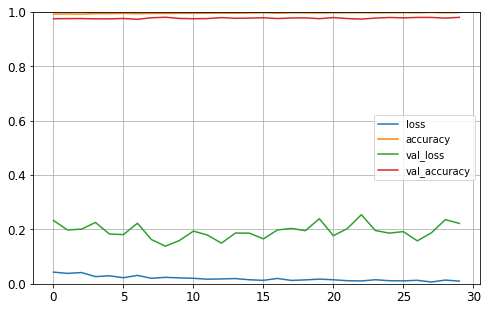

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
pd.DataFrame(history1.history).plot(figsize=(8, 5))
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


# **Plot Learning curves when using different batch size** 

*batch size = 15 *

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
history3 = model.fit(X_train, y_train, batch_size=15, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
3534/3534 [==============================] - 8s 2ms/step - loss: 0.0037 - accuracy: 0.9991 - val_loss: 0.1758 - val_accuracy: 0.9840
Epoch 2/30
3534/3534 [==============================] - 8s 2ms/step - loss: 4.1674e-04 - accuracy: 0.9999 - val_loss: 0.1750 - val_accuracy: 0.9839
Epoch 3/30
3534/3534 [==============================] - 8s 2ms/step - loss: 1.2443e-04 - accuracy: 1.0000 - val_loss: 0.1751 - val_accuracy: 0.9843
Epoch 4/30
3534/3534 [==============================] - 8s 2ms/step - loss: 9.3495e-05 - accuracy: 1.0000 - val_loss: 0.1751 - val_accuracy: 0.9841
Epoch 5/30
3534/3534 [==============================] - 8s 2ms/step - loss: 7.8342e-05 - accuracy: 1.0000 - val_loss: 0.1751 - val_accuracy: 0.9840
Epoch 6/30
3534/3534 [==============================] - 8s 2ms/step - loss: 6.8401e-05 - accuracy: 1.0000 - val_loss: 0.1752 - val_accuracy: 0.9839
Epoch 7/30
3534/3534 [==============================] - 8s 2ms/step - loss: 6.1100e-05 - accuracy: 1.0000 - val_loss

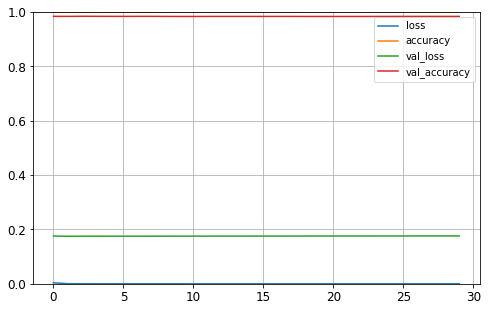

In [ ]:
import pandas as pd

pd.DataFrame(history3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2153 - accuracy: 0.9815


[0.21527089178562164, 0.9815000295639038]

*batch size = 40*

In [ ]:
history4 = model.fit(X_train, y_train, batch_size=40, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1325/1325 [==============================] - 4s 3ms/step - loss: 2.0673e-05 - accuracy: 1.0000 - val_loss: 0.1762 - val_accuracy: 0.9839
Epoch 2/30
1325/1325 [==============================] - 4s 3ms/step - loss: 2.0489e-05 - accuracy: 1.0000 - val_loss: 0.1762 - val_accuracy: 0.9839
Epoch 3/30
1325/1325 [==============================] - 4s 3ms/step - loss: 2.0309e-05 - accuracy: 1.0000 - val_loss: 0.1762 - val_accuracy: 0.9837
Epoch 4/30
1325/1325 [==============================] - 5s 4ms/step - loss: 2.0133e-05 - accuracy: 1.0000 - val_loss: 0.1762 - val_accuracy: 0.9837
Epoch 5/30
1325/1325 [==============================] - 6s 5ms/step - loss: 1.9961e-05 - accuracy: 1.0000 - val_loss: 0.1762 - val_accuracy: 0.9837
Epoch 6/30
1325/1325 [==============================] - 4s 3ms/step - loss: 1.9791e-05 - accuracy: 1.0000 - val_loss: 0.1762 - val_accuracy: 0.9837
Epoch 7/30
1325/1325 [==============================] - 4s 3ms/step - loss: 1.9624e-05 - accuracy: 1.0000 - val_

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2155 - accuracy: 0.9815


[0.21546323597431183, 0.9815000295639038]

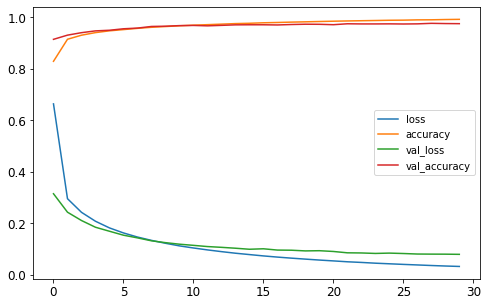

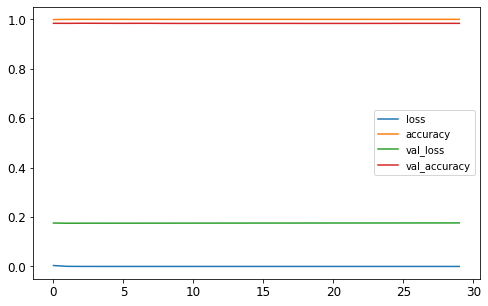

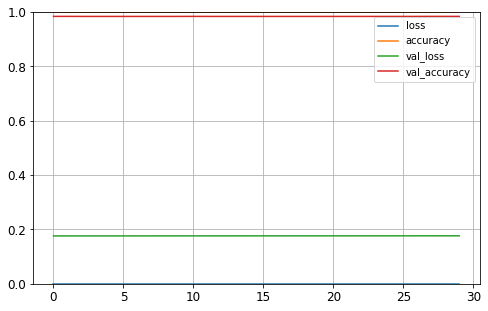

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
pd.DataFrame(history3.history).plot(figsize=(8, 5))
pd.DataFrame(history4.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# **Plot Learning curves when using different number of epochs**

*number of epochs=10*

In [ ]:
history5 = model.fit(X_train, y_train, batch_size=32, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1657/1657 [==============================] - 4s 2ms/step - loss: 1.6181e-05 - accuracy: 1.0000 - val_loss: 0.1766 - val_accuracy: 0.9837
Epoch 2/10
1657/1657 [==============================] - 4s 2ms/step - loss: 1.6048e-05 - accuracy: 1.0000 - val_loss: 0.1766 - val_accuracy: 0.9837
Epoch 3/10
1657/1657 [==============================] - 4s 2ms/step - loss: 1.5916e-05 - accuracy: 1.0000 - val_loss: 0.1766 - val_accuracy: 0.9837
Epoch 4/10
1657/1657 [==============================] - 4s 2ms/step - loss: 1.5787e-05 - accuracy: 1.0000 - val_loss: 0.1766 - val_accuracy: 0.9837
Epoch 5/10
1657/1657 [==============================] - 4s 2ms/step - loss: 1.5661e-05 - accuracy: 1.0000 - val_loss: 0.1767 - val_accuracy: 0.9837
Epoch 6/10
1657/1657 [==============================] - 4s 2ms/step - loss: 1.5537e-05 - accuracy: 1.0000 - val_loss: 0.1767 - val_accuracy: 0.9837
Epoch 7/10
1657/1657 [==============================] - 4s 2ms/step - loss: 1.5415e-05 - accuracy: 1.0000 - val_

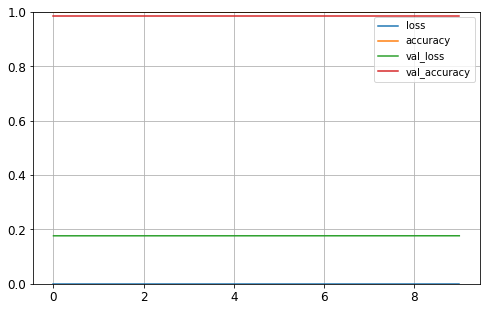

In [ ]:
import pandas as pd

pd.DataFrame(history5.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2156 - accuracy: 0.9816


[0.21555954217910767, 0.9815999865531921]

*number of epochs=20*

In [ ]:
history6 = model.fit(X_train, y_train, batch_size=32, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
1657/1657 [==============================] - 4s 2ms/step - loss: 1.4946e-05 - accuracy: 1.0000 - val_loss: 0.1768 - val_accuracy: 0.9837
Epoch 2/20
1657/1657 [==============================] - 4s 2ms/step - loss: 1.4835e-05 - accuracy: 1.0000 - val_loss: 0.1768 - val_accuracy: 0.9837
Epoch 3/20
1657/1657 [==============================] - 4s 2ms/step - loss: 1.4724e-05 - accuracy: 1.0000 - val_loss: 0.1768 - val_accuracy: 0.9837
Epoch 4/20
1657/1657 [==============================] - 4s 2ms/step - loss: 1.4616e-05 - accuracy: 1.0000 - val_loss: 0.1768 - val_accuracy: 0.9837
Epoch 5/20
1657/1657 [==============================] - 4s 2ms/step - loss: 1.4510e-05 - accuracy: 1.0000 - val_loss: 0.1768 - val_accuracy: 0.9837
Epoch 6/20
1657/1657 [==============================] - 4s 2ms/step - loss: 1.4405e-05 - accuracy: 1.0000 - val_loss: 0.1768 - val_accuracy: 0.9837
Epoch 7/20
1657/1657 [==============================] - 4s 2ms/step - loss: 1.4302e-05 - accuracy: 1.0000 - val_

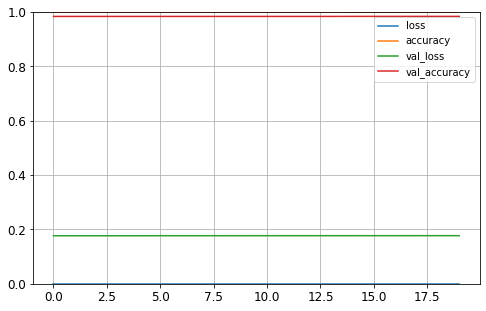

In [ ]:
import pandas as pd

pd.DataFrame(history6.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2157 - accuracy: 0.9816


[0.21570229530334473, 0.9815999865531921]

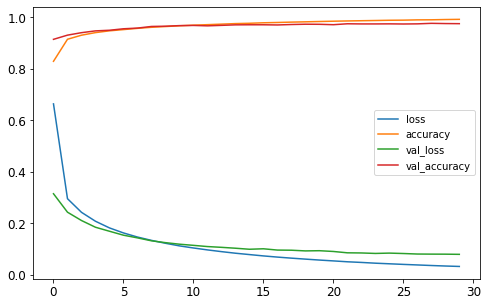

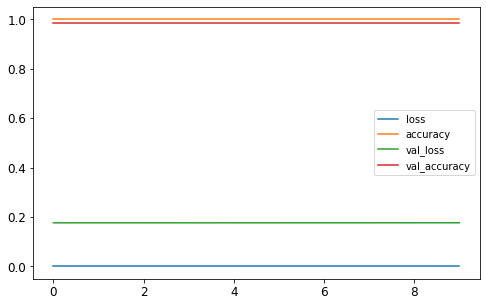

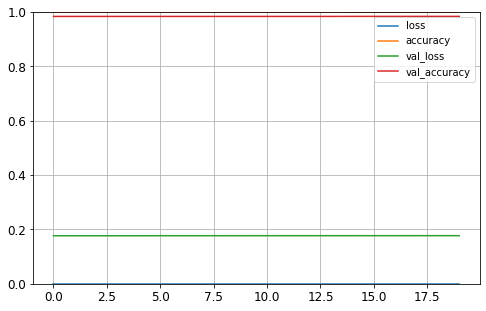

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
pd.DataFrame(history5.history).plot(figsize=(8, 5))
pd.DataFrame(history6.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# **repeat with more layers / Use Batch Normalisation**

https://keras.io/api/layers/regularization_layers/dropout/

https://keras.io/search.html?query=Batch%20Normalisation

https://keras.io/api/layers/normalization_layers/batch_normalization/

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(500, activation="relu"))
model.add((keras.layers.Dropout(0.2)))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(40, activation="softmax"))

In [ ]:
model.layers

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
history7 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1657/1657 [==============================] - 9s 5ms/step - loss: 0.4177 - accuracy: 0.8928 - val_loss: 0.1537 - val_accuracy: 0.9590
Epoch 2/30
1657/1657 [==============================] - 9s 5ms/step - loss: 0.1880 - accuracy: 0.9469 - val_loss: 0.1151 - val_accuracy: 0.9681
Epoch 3/30
1657/1657 [==============================] - 9s 5ms/step - loss: 0.1379 - accuracy: 0.9601 - val_loss: 0.1029 - val_accuracy: 0.9703
Epoch 4/30
1657/1657 [==============================] - 9s 5ms/step - loss: 0.1097 - accuracy: 0.9676 - val_loss: 0.0926 - val_accuracy: 0.9730
Epoch 5/30
1657/1657 [==============================] - 9s 6ms/step - loss: 0.0911 - accuracy: 0.9730 - val_loss: 0.0838 - val_accuracy: 0.9760
Epoch 6/30
1657/1657 [==============================] - 9s 6ms/step - loss: 0.0782 - accuracy: 0.9761 - val_loss: 0.0798 - val_accuracy: 0.9781
Epoch 7/30
1657/1657 [==============================] - 9s 5ms/step - loss: 0.0659 - accuracy: 0.9794 - val_loss: 0.0730 - val_accuracy:

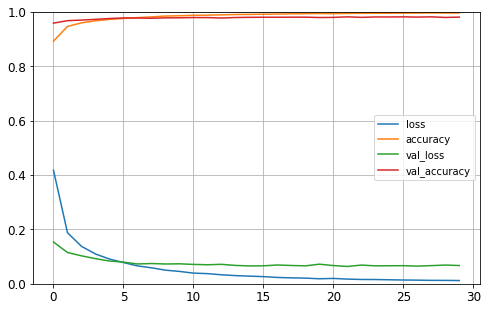

In [ ]:
pd.DataFrame(history7.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0644 - accuracy: 0.9830


[0.0644458681344986, 0.9829999804496765]

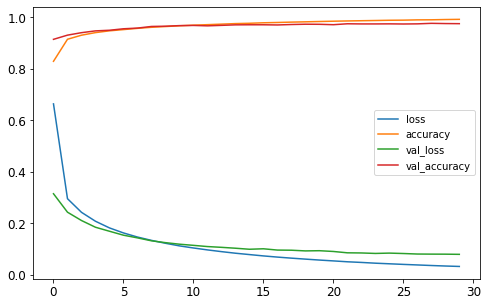

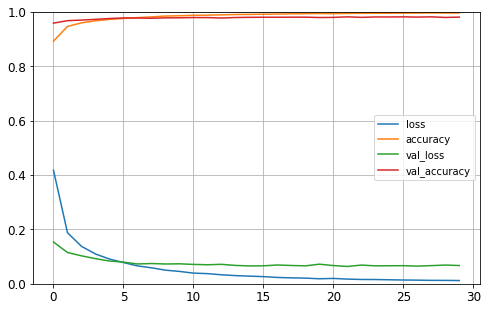

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
pd.DataFrame(history7.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()